# Pulse Compression & Matched Filtering
The above terms are used a lot in the development of sensors and communication systems. They lead to the same action, applying a filter with an impulse response that is the time reversed conjugute to the signal that is sent to a set of data samples. For both cases this is to help improve parameters for the radar. For matched filter its the signal to noise ratio and for pulse compression its the resolution along the range dimension.

In [37]:
%matplotlib inline
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

## Box Function
The simplest example of the matched filter is with a box function. This will yield a triangle pulse with a peak of the integral of the pulse sqaured. The term norm1 is the numerical approximation of the integeral, $\int p^2(t)dt$. The term $\tau$ is represented as the pulse length.

Text(0.5,1,u'Matched Filter')

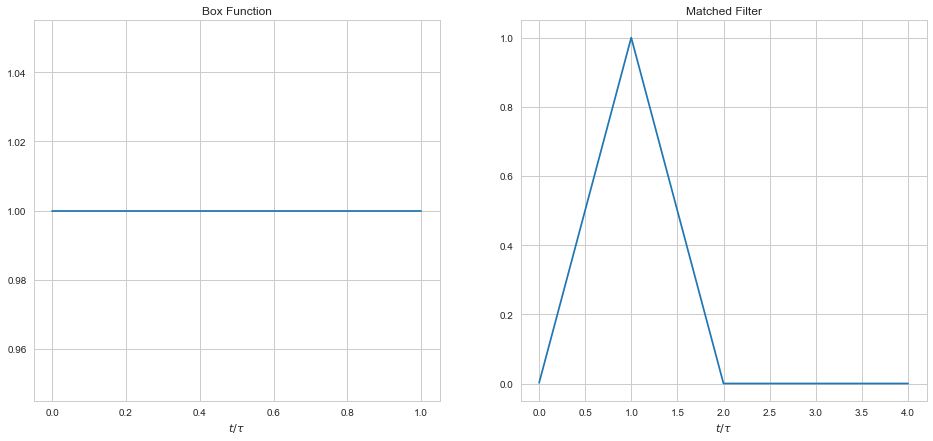

In [38]:
N_p = 512
n_ar = 4*N_p
p1 = sp.ones(N_p, dtype=float)
norm1 = sp.sum(sp.absolute(p1)**2)
x = sp.zeros(n_ar, dtype=float)
x[:N_p] = p1
p1_star = p1[::-1]
y = sp.convolve(x, p1_star)
sns.set_style("whitegrid")
sns.set_context("notebook")
fig, axvec = plt.subplots(1 ,2, figsize = (16,7))
axvec[0].plot(sp.linspace(0, 1, N_p), p1)
axvec[0].set_xlabel(r'$t/\tau$')
axvec[0].set_title('Box Function')
axvec[1].plot(sp.linspace(0, 4, n_ar), y[:n_ar]/norm1)
axvec[1].set_xlabel(r'$t/\tau$')
axvec[1].set_title('Matched Filter')

## LFM Chirp
The linear frequency modulated chrip, $p(t) = e^{j\beta t^2/\tau}$, is often used in communications and radar. This is due to its resolution which is dependent on the time bandwidth product $\tau\beta$. As can be seen from the example this gives a much more compressed pulse.

Text(0.5,1,u'Absolute Value of matched filter')

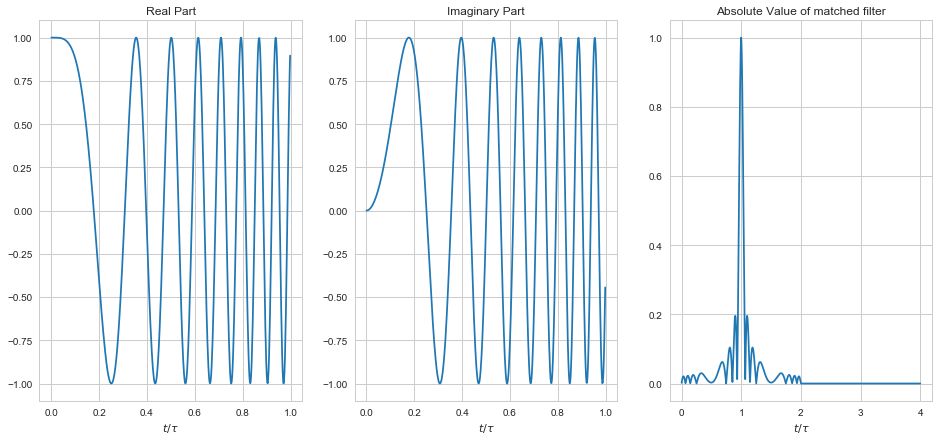

In [40]:
tbp = 50.
beta = tbp/N_p
tau = float(N_p)
t_1 = sp.arange(N_p,dtype=float)
t_p1 = t_1/N_p
p2 = sp.exp(1j*beta*t_1**2/tau)
norm2 = sp.sum(sp.absolute(p2)**2)
x = sp.zeros(n_ar, dtype=p2.dtype)
x[:N_p] = p2
p2_star = sp.conj(p2[::-1])
y = sp.convolve(x, p2_star)
fig, axvec = plt.subplots(1 ,3, figsize = (16,7))
axvec[0].plot(t_p1, p2.real)
axvec[0].set_xlabel(r'$t/\tau$')
axvec[0].set_title('Real Part')
axvec[1].plot(t_p1, p2.imag)
axvec[1].set_xlabel(r'$t/\tau$')
axvec[1].set_title('Imaginary Part')
axvec[2].plot(sp.linspace(0, 4, n_ar), sp.absolute(y[:n_ar])/norm2)
axvec[2].set_xlabel(r'$t/\tau$')
axvec[2].set_title('Absolute Value of matched filter')